In [35]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt

import glob
import random
import datetime
import tensorflow as tf
from shutil import rmtree
from keras.models import load_model
from os.path import join, getctime, basename
from models import *
from utils import *
from data_preprocess import load_prep_data

%load_ext autoreload
%autoreload 2

aug_data = load_prep_data(time=500, debug=True, onehot=True)
x_train = aug_data['x_train']
y_train = aug_data['y_train']
x_valid = aug_data['x_valid']
y_valid = aug_data['y_valid']
x_test = aug_data['x_test']
y_test = aug_data['y_test']

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Shape of x_train set: (7191, 22, 250)
Shape of y_train labels: (7191, 4)
Shape of x_valid set: (1269, 22, 250)
Shape of y_valid labels: (1269, 4)
Shape of x_test set: (1772, 22, 250)
Shape of y_test labels: (1772, 4)
Shape of x_train_valid set: (8460, 22, 250)
Shape of y_train_valid labels: (8460, 4)


In [36]:
input_shape = x_train.shape
x_train = tf.transpose( tf.expand_dims(x_train, axis=-1), perm=[0, 2, 3, 1])
x_valid = tf.transpose( tf.expand_dims(x_valid, axis=-1), perm=[0, 2, 3, 1])

In [17]:
config = {
    # Network
    'num_inputs': x_train.shape[0],
    'input_shape': (input_shape[2],1, input_shape[1]),
    'epochs': 30,
    'dropout': 0.5,
    'batch_size': 32
}
VanillaCNN2 = VanillaCNN()
VanillaCNN2.build_model(config)
history = VanillaCNN2.train(x_train, y_train, x_valid, y_valid, config, get_workpath('VanillaCNN'))

/Users/peiyuanlee/miniforge3/envs/myenv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(
/Users/peiyuanlee/miniforge3/envs/myenv/lib/python3.11/site-packages/keras/src/optimizers/base_optimizer.py:34: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 248, 1, 25)     │         1,675 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 248, 1, 25)     │           992 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 83, 1, 25)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 83, 1, 25)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2075)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │        33,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │            68 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,015 (140.68 KB)

 Trainable params: 35,487 (138.62 KB)

 Non-trainable params: 528 (2.06 KB)

Model compiled.
Epoch 1/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 15s 55ms/step - accuracy: 0.3393 - loss: 2.0181 - val_accuracy: 0.5658 - val_loss: 1.2891
Epoch 2/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - accuracy: 0.4954 - loss: 1.4122 - val_accuracy: 0.6359 - val_loss: 1.1446
Epoch 3/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - accuracy: 0.5627 - loss: 1.2184 - val_accuracy: 0.6816 - val_loss: 1.0486
Epoch 4/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - accuracy: 0.5932 - loss: 1.1327 - val_accuracy: 0.7132 - val_loss: 0.9791
Epoch 5/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - accuracy: 0.6382 - loss: 1.0449 - val_accuracy: 0.7187 - val_loss: 0.9061
Epoch 6/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - accuracy: 0.6612 - loss: 0.9843 - val_accuracy: 0.7683 - val_loss: 0.8401
Epoch 7/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - accuracy: 0.6780 - loss: 0.9365 - val_accuracy: 0.7565 - val_loss: 0.8060
Epoch 8/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - accuracy: 0.6797 -

In [18]:
x_test = tf.transpose( tf.expand_dims(x_test, axis=-1), perm=[0, 2, 3, 1])
raw = VanillaCNN2.evaluate(x_test, y_test)
print("Raw Acc result: {}".format(raw[1]))

56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.6322 - loss: 1.0136
Raw Acc result: 0.6484198570251465


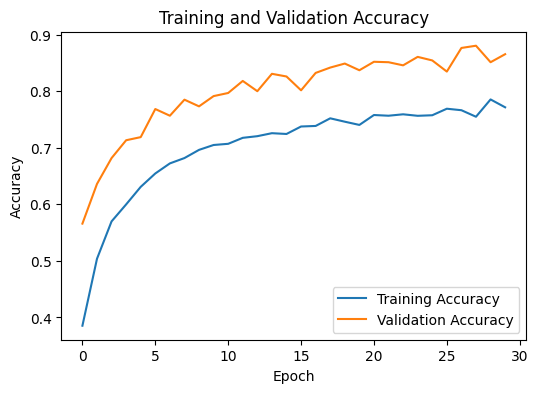

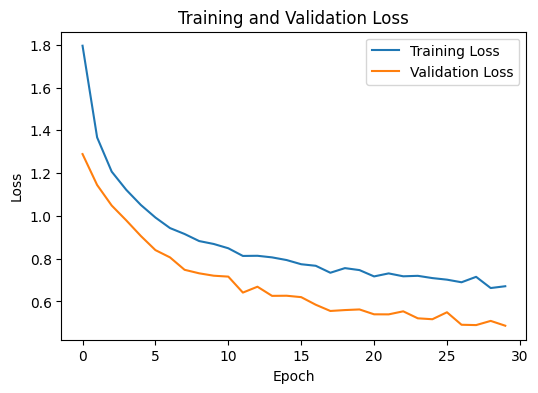

In [20]:
plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(6, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()